# Test scanning multiple QR Codes with opencv on cups

In [139]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [140]:
img = cv2.imread('qr_examples/cups.png',0)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [141]:
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#
# plt.imshow(gray)
# plt.title('my picture')
# plt.show()

In [142]:
inputImage = img

Try to detect multiple codes

In [143]:
detector = cv2.QRCodeDetector()

# Detect and decode the qrcode
retval, decoded_data, multiple_points, _straight_qrcode = detector.detectAndDecodeMulti(img)

retval, decoded_data, multiple_points

(True,
 ['', ''],
 array([[[621.      , 104.      ],
         [733.17017 , 105.00152 ],
         [728.5319  , 214.      ],
         [625.17145 , 214.      ]],
 
        [[ 70.      , 105.      ],
         [182.09    , 104.      ],
         [180.99    , 214.      ],
         [ 76.166664, 214.      ]]], dtype=float32))

['', '']

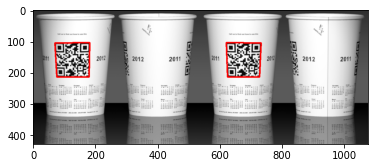

In [144]:
def display(img, multiple_points):
    img_show = img.copy()
    for points in multiple_points:
        for point_pair_1, point_pair_2 in list(zip(points, points[1:])) + [(points[-1],points[0])]:
            point_pair_1 = (int(point_pair_1[0]), int(point_pair_1[1]))
            point_pair_2 = (int(point_pair_2[0]), int(point_pair_2[1]))
            cv2.line(img_show, point_pair_1, point_pair_2,  (255, 0, 0), 3)
    return img_show

img_show = display(img, multiple_points)
plt.imshow(img_show)
decoded_data

(['http://LearnOpenCV.com'], array([[[237.,  59.],
        [406.,  59.],
        [406., 228.],
        [237., 228.]]], dtype=float32))


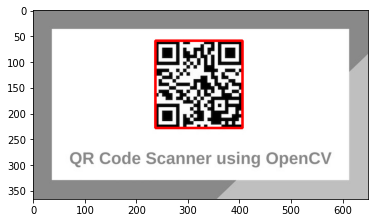

In [155]:
def display_file(path):
    file_img = cv2.imread(path,0)
    file_img = cv2.cvtColor(file_img, cv2.COLOR_BGR2RGB)
    detector = cv2.QRCodeDetector()
    show_img = file_img.copy()
    retval, decoded_data, multiple_points, _straight_qrcode = detector.detectAndDecodeMulti(show_img)
    show_img = display(show_img, multiple_points)
    print((decoded_data, multiple_points))
    return show_img

plt.imshow(display_file('qr_examples/qrcode-feature.jpg'))